In [1]:
import matplotlib.pyplot as plt
import torch
from pl_examples import _DATASETS_PATH
from torchvision.utils import make_grid

from reid.datamodules.market1501 import PairedMarket1501DataModule
from reid.models.mymodel import MyModel


In [2]:
datamodule = PairedMarket1501DataModule(
    _DATASETS_PATH, num_workers=2, batch_size=8, shuffle=True, drop_last=True
)
datamodule.setup()

In [3]:
model = MyModel.load_from_checkpoint(
    fr"mymodel\2rl3vkod\checkpoints\epoch=46-step=3007.ckpt"
)

In [4]:
for imgs, lbls in datamodule.train_dataloader():
    img_anc, img_pos, img_neg = imgs
    lbl_anc, lbl_pos, lbl_neg = lbls
    cont_anc, sty_anc = model.encoder(img_anc)
    cont_pos, sty_pos = model.encoder(img_pos)
    cont_neg, sty_neg = model.encoder(img_neg)
    img_anc_anc = model.decoder(cont_anc, sty_anc)
    img_anc_pos = model.decoder(cont_anc, sty_pos)
    img_anc_neg = model.decoder(cont_anc, sty_neg)
    break

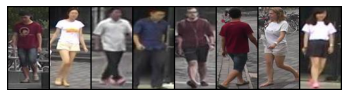

In [5]:
plt.axis('off')
plt.imshow(make_grid(img_anc, normalize=True).permute(1,2,0))

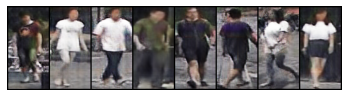

In [6]:
plt.axis('off')
plt.imshow(make_grid(img_anc_pos, normalize=True).permute(1,2,0))

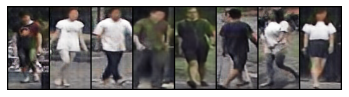

In [7]:
plt.axis('off')
plt.imshow(make_grid(img_anc_neg, normalize=True).permute(1,2,0))

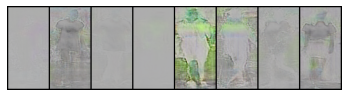

In [8]:
plt.axis('off')
plt.imshow(make_grid((img_anc_neg - img_anc_anc), normalize=True).permute(1,2,0))

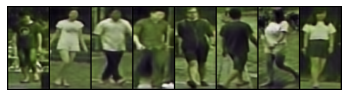

In [9]:
plt.axis('off')
plt.imshow(make_grid(model.decoder(cont_anc, torch.zeros_like(sty_anc)), normalize=True).permute(1,2,0))

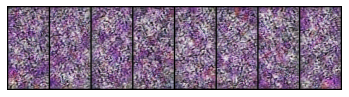

In [10]:
plt.axis('off')
plt.imshow(make_grid(model.decoder(torch.randn_like(cont_anc), sty_anc), normalize=True).permute(1,2,0))

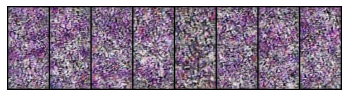

In [11]:
plt.axis('off')
plt.imshow(make_grid(model.decoder(torch.randn_like(cont_anc), sty_neg), normalize=True).permute(1,2,0))